In [2]:
import pandas as pd
import os
import numpy as np

HOUSING_PATH = "datasets"
def load_housing_data(file, housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, file)
    return pd.read_csv(csv_path, sep="\t\t", header=0, error_bad_lines=False, dtype={'taxes':np.float32}, engine='python' )

In [3]:
def get_weight(days):
    w = np.reciprocal(days/80.0)
    return w*2

print(str(get_weight(100)) + "," + str(get_weight(200)))

1.6,0.8


In [4]:
import datetime
import math

def d(s):
    [year, month, day] = map(int, s.split('-'))
    return datetime.date(year, month, day)
def get_days_gap(start, today = str(datetime.date.today())):
    return (d(today) - d(start)).days

print(get_days_gap('2017-03-08'))
    

237


In [5]:
#ml_num,br_final,bath_num,addr,basement_status,
#soldPrice,land_size,topHighschoolScore,topBelowHighschoolScore,dom,
#renovator_tag,sqft_level,sqft_level_low,sqft_level_high,yr_built_lvl,
#estimateRent,estimateRentDaysOnMarket,estimateSquarefootage,est_rent_yearreturn_percentile,price_sold_growth_yoy,
#price_sold_median,dom_avg,price_sold_growth_yoy_percentile,latitude,longitude,  20-24
#front_adjustedInFt,depth_adjustedInFt,photo_num,est_yr_built,log_debug,
#flg_live,s_r,community_plus_code,community,municipality_code, 30-34
#municipality,acres,bsmt1_out,bsmt2_out,date_start,
#date_end,area,ad_text,extras,prop_feat1_out,    40-44
#prop_feat2_out,prop_feat3_out,prop_feat4_out,prop_feat5_out,prop_feat6_out,
#type_own_srch,constr1_out,drive,gar_spaces,park_spcs,
#style,gar_type,yr_built,taxes,type_own1_out,lp_dol

import re


fts = [1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,28,31,32,33,34,35,39,40,42,43,44,45,46,47,48,49,\
       50,53,54,55,56,57,58,59,60]
fts = [1,2,4,6,7,8,9,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,31,32,34,35,39,40,42,43,44,45,46,47,48,\
      49,50,53,54,55,56,57,58,59,60]

text_fts = {'ad_text':42, 'extras':43, 'prop_feat1_out':44, 'prop_feat2_out':45, 'prop_feat3_out':46, \
           'prop_feat4_out':47, 'prop_feat5_out':48, 'prop_feat6_out':49 }
catg_fts = {'community_plus_code':32, 'municipality_code':34, 'municipality':35, 'style':55, 'gar_type':56,'type_own1_out':59}
nume_fts = {'br_final':1, 'bath_num':2, 'basement_status':4, 'land_size':6,'topHighschoolScore':7,'topBelowHighschoolScore':8,\
'dom':9, 'sqft_level':11,'sqft_level_low':12, 'sqft_level_high':13,'yr_built_lvl':14, 'estimateRent':15, \
'estimateSquarefootage':17, 'est_rent_yearreturn_percentile':18, 'price_sold_growth_yoy':19, 'price_sold_median':20, \
'dom_avg':21, 'price_sold_growth_yoy_percentile':22, 'latitude':23, 'longitude':24, 'front_adjustedInFt':25, \
'depth_adjustedInFt':26, 'photo_num':27,'gar_spaces':53,'park_spcs':54, 'taxes':58, 'lp_dol':60}

cdate = {'date_start':39, 'date_end':40,}

#'s_r':31,

out1 = open("datasets/n_features.csv", 'w')
out2 = open("datasets/c_features.csv", 'w')
    
with open('datasets/housing.csv', 'r') as f:

    is_header = True

    for line in f:

        nflist = []
        cflist = []
        
        cols = line.strip("\r").strip("\n").split("\t")

        if len(cols) == 61:
        
            if cols[31] == 'Sale':  # s_r
                continue;
            
            if not is_header:
                p_ds = cdate['date_start']
                p_de = cdate['date_end']
                nflist.append(get_days_gap(cols[p_ds].split(" ")[0], cols[p_de].split(" ")[0]))
                nflist.append(get_days_gap(cols[p_de].split(" ")[0]))
                [nflist.append(math.log(len(cols[i]) + math.e)) for i in text_fts.values()]

            else:
                nflist.append("list_days")
                nflist.append("days_to_now")
                is_header = False
                [nflist.append(cols[i]) for i in text_fts.values()]

            [nflist.append(cols[i]) for i in nume_fts.values()]
            [cflist.append(re.sub(r'\W+', '', cols[i], 100)) for i in catg_fts.values()]

            snlist = "\t\t".join(map(str, nflist))
            sclist = "\t\t".join(map(str, cflist))
            out1.write(snlist+"\n")
            out2.write(sclist+"\n")
out1.close()
out2.close()

In [233]:
nfs= load_housing_data(file="n_features.csv")
cfs= load_housing_data(file="c_features.csv")

In [234]:
nfs.describe()

,list_days,days_to_now,ad_text,prop_feat6_out,prop_feat3_out,prop_feat2_out,prop_feat1_out,prop_feat5_out,extras,prop_feat4_out,...,front_adjustedInFt,depth_adjustedInFt,land_size,dom_avg,yr_built_lvl,taxes,bath_num,estimateRent,br_final,topBelowHighschoolScore
count,19785.000000,19785.00000,19785.000000,19785.000000,19785.000000,19785.000000,19785.000000,19785.000000,19785.000000,19785.000000,...,19785.000000,19785.000000,1.978500e+04,19785.000000,19785.000000,19785.000000,19785.000000,19785.00000,19785.000000,19785.000000
mean,28.685924,188.27349,5.792583,1.154720,1.525532,1.606644,1.709182,1.305533,4.763189,1.440521,...,-678.142115,-665.168830,1.784082e+03,-315.985494,-524.311372,-884.736938,2.035178,119.21491,2.370660,6.902067
std,30.174684,43.89736,0.412803,0.429020,0.719994,0.720510,0.742891,0.615360,0.752729,0.712851,...,390.426930,421.823564,2.256310e+04,443.087083,440.143134,145.389557,1.113493,3321.59351,1.168924,1.482743
min,0.000000,79.00000,1.904832,1.000000,1.000000,1.000000,1.000000,1.000000,1.313262,1.000000,...,-888.000000,-888.000000,-8.880000e+02,-888.000000,-888.000000,-888.000000,0.000000,-888.00000,0.000000,2.000000
25%,8.000000,167.00000,5.644451,1.000000,1.000000,1.000000,1.000000,1.000000,4.485466,1.000000,...,-888.000000,-888.000000,0.000000e+00,-888.000000,-888.000000,-888.000000,1.000000,-888.00000,1.500000,5.300000
50%,19.000000,201.00000,5.896380,1.000000,1.000000,1.000000,1.000000,1.000000,4.939628,1.000000,...,-888.000000,-888.000000,0.000000e+00,15.000000,-888.000000,-888.000000,2.000000,-888.00000,2.000000,7.500000
75%,39.000000,222.00000,6.070087,1.000000,2.165422,2.274009,2.543040,1.000000,5.306872,2.043592,...,-888.000000,-888.000000,0.000000e+00,27.000000,2.500000,-888.000000,3.000000,1650.00000,3.000000,7.800000
max,370.000000,244.00000,6.147866,2.929501,2.929501,3.031016,3.031016,2.929501,5.500108,2.929501,...,1650.000000,2633.000000,2.178000e+06,167.000000,100.000000,12375.769531,15.000000,408984.00000,9.000000,10.000000


In [156]:
nfs.describe()['park_spcs']

count    19785.000000
mean         1.543644
std          7.047298
min       -888.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        318.000000
Name: park_spcs, dtype: float64

In [235]:
rlist = ['prop_feat3_out', 'prop_feat6_out', 'prop_feat2_out','prop_feat1_out', 'prop_feat4_out', 'prop_feat5_out',\
        'est_rent_yearreturn_percentile', 'land_size', 'dom', 'yr_built_lvl', 'price_sold_growth_yoy_percentile', \
         'price_sold_growth_yoy', 'estimateRent', 'park_spcs']
nfeats = nfs.drop(rlist, axis=1)
nfeats = nfeats.drop("taxes", axis=1)
m = nfeats["gar_spaces"] < 10
nfeats.where(m, nfeats["gar_spaces"] / 10, axis=1,inplace=True)

In [236]:
nfeats = nfeats[nfeats['lp_dol'] >= 1000]
nfeats = nfeats[nfeats['lp_dol'] <= 10000]

In [237]:
nfeats.describe()

,list_days,days_to_now,ad_text,extras,topHighschoolScore,latitude,basement_status,sqft_level,gar_spaces,price_sold_median,...,sqft_level_high,sqft_level_low,photo_num,longitude,front_adjustedInFt,depth_adjustedInFt,dom_avg,bath_num,br_final,topBelowHighschoolScore
count,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000,1.934100e+04,...,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000
mean,28.153250,188.253038,5.800188,4.776069,6.465643,43.239850,5.609379,841.413422,-497.462282,7.146814e+05,...,-281.031798,-381.166227,10.775710,-79.871697,-680.219116,-667.439294,-311.805439,2.047878,2.391241,6.911969
std,29.345302,43.909579,0.403903,0.740787,1.711233,21.181647,1.394254,824.527465,441.293616,4.795860e+05,...,1359.790855,1121.310770,6.062161,18.382144,388.956192,420.222179,441.972362,1.100617,1.159210,1.478996
min,0.000000,79.000000,1.904832,1.313262,0.000000,-888.000000,4.000000,0.000000,-888.000000,-8.880000e+02,...,-888.000000,-888.000000,1.000000,-888.000000,-888.000000,-888.000000,-888.000000,0.000000,0.000000,2.000000
25%,8.000000,168.000000,5.651500,4.507759,5.000000,43.641728,5.000000,0.000000,-888.000000,4.705000e+05,...,-888.000000,-888.000000,6.000000,-79.528883,-888.000000,-888.000000,-888.000000,1.000000,1.500000,5.300000
50%,18.000000,201.000000,5.901863,4.953841,6.900000,43.685242,5.000000,649.500000,-888.000000,5.615000e+05,...,-888.000000,-888.000000,10.000000,-79.410245,-888.000000,-888.000000,15.000000,2.000000,2.000000,7.500000
75%,39.000000,222.000000,6.072395,5.311817,7.800000,43.794296,5.000000,1099.500000,1.000000,8.500000e+05,...,-888.000000,-888.000000,16.000000,-79.381660,-888.000000,-888.000000,27.000000,3.000000,3.000000,7.800000
max,370.000000,244.000000,6.147866,5.500108,9.100000,45.481655,10.000000,5000.000000,8.000000,4.625000e+06,...,10000.000000,5000.000000,20.000000,-75.542448,1650.000000,2633.000000,167.000000,15.000000,9.000000,10.000000


In [238]:
nfeats[nfeats == 0] = np.nan
nfeats[nfeats == -888] = np.nan
nfeats.head(10)


,list_days,days_to_now,ad_text,extras,topHighschoolScore,latitude,basement_status,sqft_level,gar_spaces,price_sold_median,...,sqft_level_high,sqft_level_low,photo_num,longitude,front_adjustedInFt,depth_adjustedInFt,dom_avg,bath_num,br_final,topBelowHighschoolScore
0,247.0,153.0,5.732429,4.002198,4.1,43.640415,6.0,1300.0,NaN,NaN,...,1500.0,1100.0,1.0,-79.436709,20.00,100.00,NaN,4.0,NaN,8.0
1,181.0,218.0,6.141431,5.340985,5.0,44.908812,6.0,2250.0,1.0,NaN,...,2500.0,2000.0,20.0,-79.387793,NaN,NaN,NaN,3.0,3.5,5.0
2,173.0,244.0,5.157435,5.387785,6.3,43.688670,5.0,NaN,1.0,780000.0,...,NaN,NaN,4.0,-79.827221,NaN,NaN,15.0,5.0,4.5,5.0
3,191.0,214.0,5.825169,4.200479,5.0,43.060225,4.0,NaN,2.0,NaN,...,NaN,NaN,20.0,-79.140513,36.09,91.86,NaN,4.0,4.0,5.0
4,160.0,241.0,5.952511,4.776753,5.0,44.158866,4.0,2250.0,2.0,NaN,...,2500.0,2000.0,6.0,-79.787816,36.00,110.00,NaN,3.0,4.0,5.0
5,157.0,240.0,5.281773,5.316738,5.0,42.912888,10.0,2250.0,3.0,NaN,...,2500.0,2000.0,1.0,-79.265382,1650.00,1320.00,NaN,2.0,4.0,5.0
6,181.0,214.0,5.487773,5.286843,8.7,43.879865,5.0,3250.0,2.0,1580000.0,...,3500.0,3000.0,17.0,-79.297306,NaN,120.41,NaN,3.0,4.0,8.2
7,266.0,148.0,6.143581,5.245540,5.0,43.641930,5.0,1299.5,NaN,538000.0,...,NaN,NaN,20.0,-79.381494,NaN,NaN,39.0,2.0,2.0,7.5
8,202.0,191.0,5.990760,4.518722,6.7,43.753532,8.0,NaN,1.0,621667.0,...,NaN,NaN,1.0,-79.728623,NaN,NaN,NaN,1.0,2.0,5.0
10,216.0,242.0,6.072395,3.945811,8.3,43.788763,5.0,1300.0,NaN,1007500.0,...,1500.0,1100.0,10.0,-79.288917,64.00,231.00,NaN,2.0,4.0,7.9


In [239]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#nfeats_scaled = pd.DataFrame(scaler.fit_transform(nfeats), columns=df.columns)

In [240]:
nfeats.to_csv("datasets/process_nfeatures.csv", sep="\t")


In [241]:
lat = nfeats['latitude'].copy()
long = nfeats['longitude'].copy()
y = nfeats['lp_dol'].copy()
#nfeats = nfeats.drop(['latitude','longitude', 'lp_dol'], axis=1)   # test, removed for SVD imputation because of negative values.
nfeats = nfeats.drop(['latitude','longitude'], axis=1)

In [242]:
X = nfeats.as_matrix()
X[X == 0] = np.nan
X[X == -888] = np.nan

In [243]:
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute,MatrixFactorization, IterativeSVD
# Instead of solving the nuclear norm objective directly, instead
# induce sparsity using singular value thresholding
#X_filled_softimpute = SoftImpute().complete(X)
biscaler = BiScaler()
softImpute = SoftImpute()
mf = MatrixFactorization()
isvd = IterativeSVD()
X_filled = isvd.complete(X)
#X_filled = softImpute.complete(X_normalize)

[IterativeSVD] Iter 1: observed MAE=174.440577
[IterativeSVD] Iter 2: observed MAE=91.323383
[IterativeSVD] Iter 3: observed MAE=14.260103
[IterativeSVD] Iter 4: observed MAE=2.981918


In [244]:
nfilledfts = pd.DataFrame(X_filled, columns=nfeats.columns)
nfilledfts.to_csv("datasets/filled_nfeatures.csv", sep="\t")
nfilledfts['weight'] = get_weight(nfilledfts['days_to_now'])
nfilledfts.describe()

,list_days,days_to_now,ad_text,extras,topHighschoolScore,basement_status,sqft_level,gar_spaces,price_sold_median,lp_dol,...,sqft_level_high,sqft_level_low,photo_num,front_adjustedInFt,depth_adjustedInFt,dom_avg,bath_num,br_final,topBelowHighschoolScore,weight
count,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000,1.934100e+04,19341.000000,...,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000
mean,28.301010,188.253038,5.800188,4.776069,6.465971,5.609379,1121.756405,0.987985,7.147371e+05,2260.320149,...,1091.844140,844.941873,10.775710,25.292278,66.979447,26.071246,2.048577,2.410019,6.911969,0.917674
std,29.272432,43.909579,0.403903,0.740787,1.710602,1.394254,700.091287,0.539311,4.795029e+05,916.156909,...,822.797567,628.524024,6.062161,24.528456,57.346714,13.049587,1.100480,1.131323,1.478996,0.300543
min,1.000000,79.000000,1.904832,1.313262,1.400000,4.000000,249.500000,0.241229,2.545726e+00,1000.000000,...,256.391322,192.317365,1.000000,2.747361,5.622068,1.000000,1.000000,0.500000,2.000000,0.655738
25%,8.000000,168.000000,5.651500,4.507759,5.000000,5.000000,649.500000,0.617341,4.705000e+05,1750.000000,...,628.212221,480.888742,6.000000,14.174198,38.129997,18.000000,1.000000,1.500000,5.300000,0.720721
50%,19.000000,201.000000,5.901863,4.953841,6.900000,5.000000,861.086223,0.807549,5.615000e+05,2000.000000,...,790.789643,612.659372,10.000000,17.897856,47.531521,23.000000,2.000000,2.000000,7.500000,0.796020
75%,39.000000,222.000000,6.072395,5.311817,7.800000,5.000000,1300.000000,1.000000,8.500000e+05,2500.000000,...,1110.299831,871.872275,16.000000,30.069617,88.904802,34.000000,3.000000,3.000000,7.800000,0.952381
max,370.000000,244.000000,6.147866,5.500108,9.100000,10.000000,5000.000000,8.000000,4.625000e+06,10000.000000,...,10000.000000,5000.000000,20.000000,1650.000000,2633.000000,167.000000,15.000000,9.000000,10.000000,2.025316


In [245]:
nfilledfts['bath_avg'] = (nfilledfts['bath_num']) / (nfilledfts['br_final'])
#nfilledfts['lp_dol'] = y
nfilledfts['latitude'] = lat
nfilledfts['longitude'] = long

In [246]:
cfs = cfs.fillna("missing")
cfs.head()

,style,type_own1_out,municipality_code,community_plus_code,municipality,gar_type
0,3Storey,AttRowTwnhouse,01W01,01W010480,Toronto,None
1,2Storey,AttRowTwnhouse,2606,2606,Gravenhurst,BuiltIn
2,2Storey,Detached,0502,05020050,Brampton,Attached
3,2Storey,Detached,4609,4609,NiagaraFalls,BuiltIn
4,2Storey,Detached,0412,04120010,NewTecumseth,Attached


In [247]:
corr_matrix = nfilledfts.corr()
corr_matrix["lp_dol"].sort_values(ascending=False)

lp_dol                     1.000000
sqft_level                 0.545497
sqft_level_high            0.540643
estimateSquarefootage      0.523183
sqft_level_low             0.520908
bath_num                   0.482741
br_final                   0.412608
price_sold_median          0.410646
gar_spaces                 0.386479
dom_avg                    0.312724
depth_adjustedInFt         0.268493
front_adjustedInFt         0.258498
photo_num                  0.240743
basement_status            0.215008
topBelowHighschoolScore    0.179747
list_days                  0.170205
ad_text                    0.150048
bath_avg                   0.145701
extras                     0.122448
topHighschoolScore         0.058916
weight                     0.052410
latitude                  -0.010053
longitude                 -0.012008
days_to_now               -0.058677
Name: lp_dol, dtype: float64

In [248]:
data = pd.concat([nfilledfts, cfs], axis=1, join_axes=[nfilledfts.index])
data.head()
data.shape

(19341, 30)

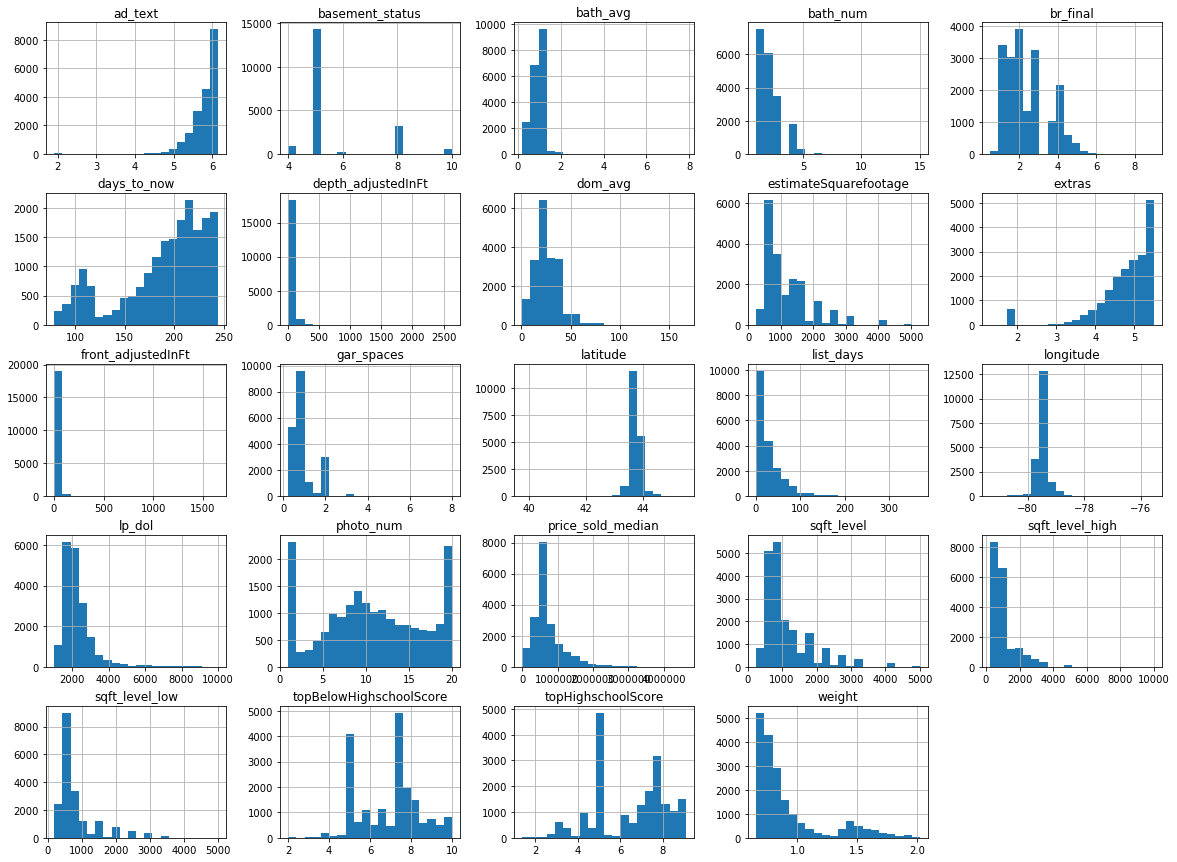

In [249]:
import matplotlib.pyplot as plt
data.hist(bins=20, figsize=(20,15))
plt.show()

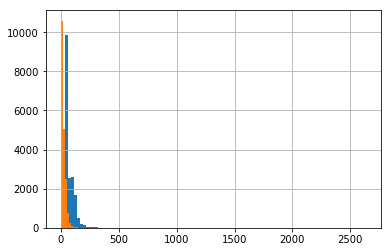

In [250]:
data['depth_adjustedInFt'].hist(bins=100, figsize=(6,4))
data['front_adjustedInFt'].hist(bins=100, figsize=(6,4))
plt.show()

In [251]:
data["depth_adjustedInFt"].where(data["depth_adjustedInFt"] < 5000, 5000, inplace=True)
data["front_adjustedInFt"].where(data["front_adjustedInFt"] < 5000, 5000, inplace=True)

In [252]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

train_set = train_set[~train_set['lp_dol'].isnull()]

train_set.shape


(15472, 30)

In [253]:
X_train = train_set.drop(['lp_dol', 'weight', 'days_to_now'], axis=1) 
weight = train_set['weight'].copy()                       
y = train_set['lp_dol'].copy()

In [254]:
X_train.describe()

,list_days,ad_text,extras,topHighschoolScore,basement_status,sqft_level,gar_spaces,price_sold_median,estimateSquarefootage,sqft_level_high,...,photo_num,front_adjustedInFt,depth_adjustedInFt,dom_avg,bath_num,br_final,topBelowHighschoolScore,bath_avg,latitude,longitude
count,15472.000000,15472.000000,15472.000000,15472.000000,15472.000000,15472.000000,15472.000000,1.547200e+04,15472.000000,15472.000000,...,15472.000000,15472.000000,15472.000000,15472.000000,15472.000000,15472.000000,15472.000000,15472.000000,15118.000000,15118.000000
mean,28.319782,5.801923,4.774791,6.474887,5.613495,1124.879553,0.990147,7.178066e+05,1230.376730,1094.969993,...,10.777598,25.386941,66.968286,26.099072,2.050976,2.410054,6.919067,0.873490,43.722612,-79.451636
std,29.260803,0.400711,0.743789,1.707810,1.396337,703.948667,0.542937,4.815094e+05,771.075448,822.752126,...,6.074025,25.464118,56.680681,13.035518,1.103139,1.133293,1.475859,0.260981,0.170939,0.224390
min,1.000000,1.904832,1.313262,1.400000,4.000000,249.500000,0.241229,2.545726e+00,249.500000,256.391322,...,1.000000,2.747361,5.622068,1.000000,1.000000,0.500000,2.000000,0.200000,39.773895,-81.317468
25%,8.000000,5.651500,4.507759,5.000000,5.000000,649.500000,0.616641,4.705000e+05,649.500000,628.332028,...,6.000000,14.167458,38.063143,18.000000,1.000000,1.500000,5.300000,0.666667,43.641791,-79.522012
50%,19.000000,5.901863,4.946760,6.900000,5.000000,860.363743,0.808068,5.627500e+05,949.500000,791.097910,...,10.000000,17.900660,47.561473,23.000000,2.000000,2.000000,7.500000,1.000000,43.685586,-79.409829
75%,39.000000,6.072395,5.311817,7.800000,5.000000,1300.000000,1.000000,8.555820e+05,1699.500000,1114.866203,...,16.000000,30.078877,88.580000,34.000000,3.000000,3.000000,7.800000,1.000000,43.795136,-79.380732
max,370.000000,6.147866,5.500108,9.100000,10.000000,5000.000000,8.000000,4.625000e+06,5272.059930,10000.000000,...,20.000000,1650.000000,2608.000000,167.000000,15.000000,9.000000,10.000000,4.000000,45.420707,-75.672409


In [255]:
X_test = test_set.drop(['lp_dol', 'weight', 'days_to_now'], axis=1) 
weight_test = test_set['weight'].copy()                       
y_test = test_set['lp_dol'].copy()

In [256]:
num_attribs = nfilledfts.drop(['lp_dol', 'weight', 'days_to_now'], axis=1).columns
cat_attribs = cfs.columns

print(cat_attribs)


Index(['style', 'type_own1_out', 'municipality_code', 'community_plus_code',
       'municipality', 'gar_type'],
      dtype='object')


In [257]:
print(len(num_attribs))

21


In [258]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelBinarizer

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values


In [259]:
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
        #('maxmin_scaler', MinMaxScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', Imputer(strategy="most_frequent")),
        ('label_binarizer', LabelBinarizer()),
    ])

In [260]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        #("cat_pipeline", cat_pipeline),
    ])

In [261]:
X_train.shape

(15472, 27)

In [262]:
X_train_n = full_pipeline.fit_transform(X_train)
X_train_n.shape

(15472, 21)

In [263]:
## for test data
X_test_n = full_pipeline.fit_transform(X_test)
X_test_n.shape

(3869, 21)

In [264]:
lb1 = LabelBinarizer()
sty = train_set['style'].copy()
style = lb1.fit_transform(sty)

style_test = lb1.transform(test_set['style'].copy())

In [265]:

lb2 = LabelBinarizer()
too = train_set['type_own1_out'].copy()
type_own1_out = lb2.fit_transform(too)

type_own1_out_test = lb2.transform(test_set['type_own1_out'].copy())

In [266]:
lb3 = LabelBinarizer()
mp = train_set['municipality'].copy()
municipality = lb3.fit_transform(mp)

municipality_test = lb3.transform(test_set['municipality'].copy())

In [267]:
lb4 = LabelBinarizer()
gt = train_set['gar_type'].copy()
gar_type = lb4.fit_transform(gt)

gar_type_test = lb4.transform(test_set['gar_type'].copy())

In [268]:
lb5 = LabelBinarizer()
cpc = train_set['community_plus_code'].copy()
community_plus_code = lb5.fit_transform(cpc)

community_plus_code_test = lb5.transform(test_set['community_plus_code'].copy())

In [269]:
X_train_pro = np.c_[X_train_n, style, type_own1_out, municipality, gar_type, community_plus_code]
#X_train_pro = np.c_[X_train_n, style, type_own1_out, municipality, gar_type]
#X_train_pro = X_train_n

X_test_pro = np.c_[X_test_n, style_test, type_own1_out_test, municipality_test, gar_type_test, community_plus_code_test]

In [270]:
X_train_pro.shape

(15472, 722)

In [271]:
X_train_pro_full = np.c_[X_train_pro, y, weight]
X_train_pro_t, val_set = train_test_split(X_train_pro_full, test_size=0.2, random_state=42)
X_train_pro_t.shape




(12377, 724)

In [272]:
#X_test_pro_full = np.c_[X_test_pro, y_test, weight_test]

In [273]:
X_train_pro_train = X_train_pro_t[:, :722]
y_train = X_train_pro_t[:, 722]
w_train = X_train_pro_t[:, 723]

X_val = val_set[:, :722]
y_val = val_set[:, 722]
w_val = val_set[:, 723]

In [274]:
y_train[0]

2300.0

In [275]:
y_val[0]

1710.0

In [284]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, learning_rate=0.3)
    
min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train_pro_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break # early stopping


predictions = gbrt.predict(X_train_pro_train)
lin_mse = mean_squared_error(y_train,predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

324.335337919


In [285]:
#print(gbrt.estimators_.shape)

p_test = gbrt.predict(X_test_pro)
print(np.sqrt(mean_squared_error(y_test, p_test)))

608.258467984


In [286]:
print(gbrt.score(X_train_pro_train, y_train))

0.875707057307


In [287]:
print(gbrt.score(X_test_pro, y_test))

0.572344602515


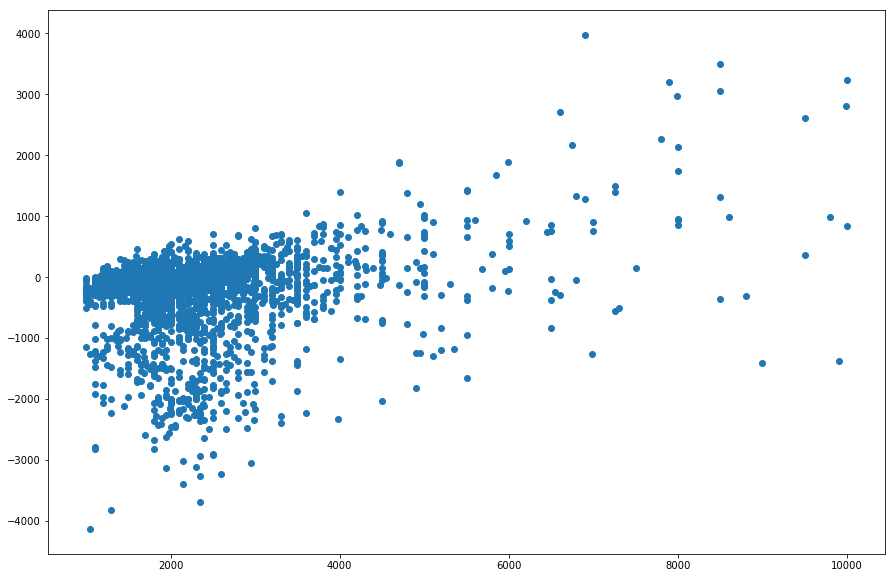

In [288]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(15, 10))
plt.scatter(y_test, y_test - p_test)
plt.show()

In [277]:
from sklearn import linear_model

X_train_ = X_train_pro_full[:, :722]
y_train_ = X_train_pro_full[:, 722]
w_train_ = X_train_pro_full[:, 723]

clf = linear_model.SGDRegressor(max_iter=200, penalty='elasticnet')
clf.fit(X_train_, y_train_)

predictions = clf.predict(X_train_)
lin_mse = mean_squared_error(y_train_,predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

664.462393574


In [278]:
p_test = clf.predict(X_test_pro)
print(np.sqrt(mean_squared_error(y_test, p_test)))

660.006979417


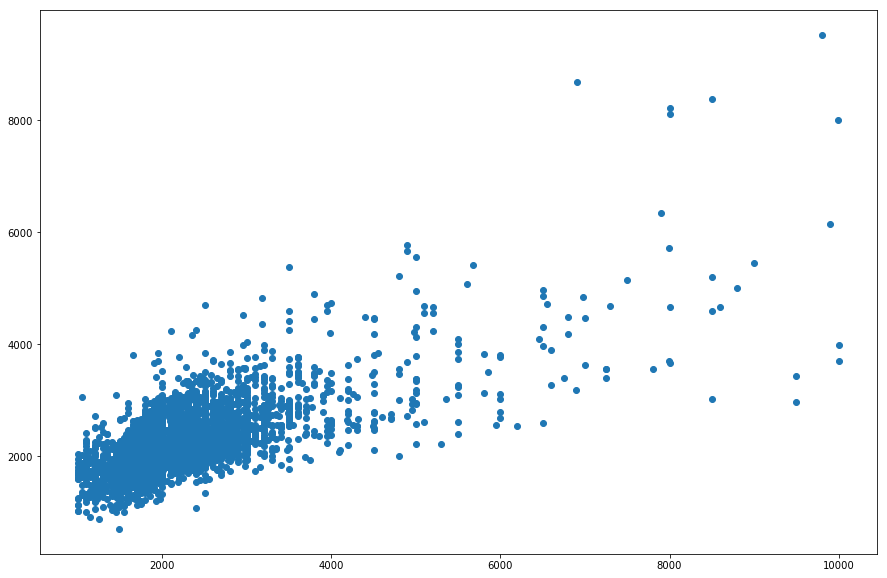

In [282]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(15, 10))
plt.scatter(y_test, p_test)
plt.show()

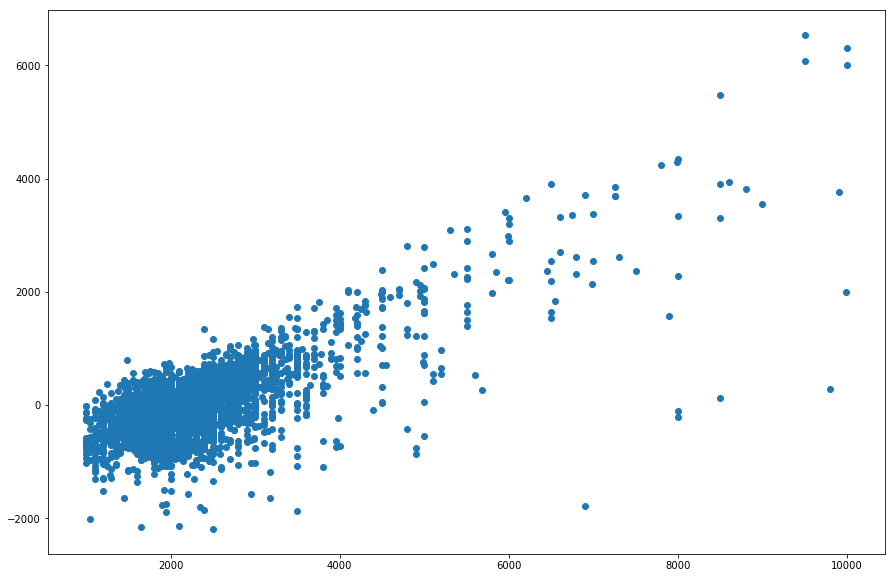

In [283]:
plt.figure(1, figsize=(15, 10))
plt.scatter(y_test, y_test-p_test)
plt.show()

In [290]:
#use GridSearch find best hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

'''
param_grid = [
{'n_estimators': [100, 125, 150], 'max_features': [100, 200, 300, 500]},
{'bootstrap': [False], 'n_estimators': [100, 125, 150], 'max_features': [100,200,300, 500]} ]
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train_, y_train_)

print(grid_search.best_params_)  # {'n_estimators': 300, 'max_features': 3}

#print(grid_search.best_estimator_.max_depth)

best_model = grid_search.best_estimator_

'''

best_model = RandomForestRegressor(n_estimators=150, max_features=300, bootstrap=false)
predictions = best_model.predict(X_train_)
lin_mse = mean_squared_error(y_train_,predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)    

{'n_estimators': 150, 'max_features': 300, 'bootstrap': False}
0.00378983685407


In [291]:
p_test = best_model.predict(X_test_pro)
print(np.sqrt(mean_squared_error(y_test, p_test)))

466.920540848


In [292]:
print(best_model.score(X_train_, y_train_))

0.999999999983


In [293]:
print(best_model.score(X_test_pro, y_test))

0.747998230693


In [302]:
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(hidden_layer_sizes=(200), 
                  activation='logistic', solver='lbfgs')

n = nn.fit(X_train_, y_train_)
predictions = nn.predict(X_train_)
lin_mse = mean_squared_error(y_train_,predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)  

305.550888437


In [303]:
p_test = nn.predict(X_test_pro)
print(np.sqrt(mean_squared_error(y_test, p_test)))

427.018424714


In [304]:
print(nn.score(X_train_, y_train_))

0.887897376689


In [305]:
print(nn.score(X_test_pro, y_test))

0.789228998885
